In [3]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import SimpleExpSmoothing

In [2]:
df = pd.read_csv("C:/Users/Administrator.DAI-PC2/Desktop/ML/Day13/monthly-milk-production-pounds-p.csv")
df

,Month,Milk
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727
...,...,...
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797


In [18]:
y=df['Milk']

y_train = df['Milk'][:-12]
y_test = df['Milk'][-12:]
alpha = 0.4

#simple exponential smoothing
ses = SimpleExpSmoothing(y_train)
fit1 = ses.fit(smoothing_level = alpha)
fcast1 = fit1.forecast(len(y_test))

C:\ProgramData\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


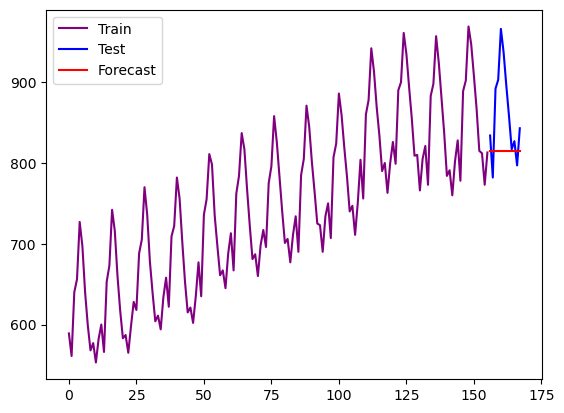

In [22]:
#plot
y_train.plot(color='purple', label='Train')
y_test.plot(color='blue', label='Test')
fcast1.plot(color='red', label='Forecast')
plt.legend(loc='best')
plt.show()

In [20]:
print(fit1.params)

{'smoothing_level': 0.4, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 589.0, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [21]:
print("RMSE= ", np.sqrt(mean_squared_error(y_test, fcast1)))

RMSE=  72.658498800867


In [ ]:
#aplha = 0.1, RMSE=  57.02407775273818
#aplha = 0.2, RMSE=  60.41719003278307
#aplha = 0.3, RMSE=  66.49878205261881
#aplha = 0.4, RMSE=  72.658498800867